## Import Data and packages

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

### import csv as pandas dataframe

In [5]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### check missing values

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
# checking duplicates 
df.duplicated().sum()


0

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check statistics of data set

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
print(f"gender {df['gender'].unique()}")
print(df['test_preparation_course'].unique())
print(df['lunch'].unique())
print(df['parental_level_of_education'].unique())
print(df['race_ethnicity'].unique())


gender ['female' 'male']
['none' 'completed']
['standard' 'free/reduced']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['group B' 'group C' 'group A' 'group D' 'group E']


In [30]:
# define numerical and categorical colums
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

print(f'numerical features : {numeric_features} ')
print(f'categorical features : {categorical_features}')

# print('num feature {}'.format(numeric_features ))

numerical features : ['math_score', 'reading_score', 'writing_score'] 
categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
num feature ['math_score', 'reading_score', 'writing_score']


### Adding columns for "Total Score" and "Average"


In [32]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['avg_score'] = df['total_score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [41]:
full_score_reading = df[df['reading_score']== 100]['avg_score'].count()
full_score_math = df[df['math_score']== 100]['avg_score'].count()
full_score_writing = df[df['writing_score']== 100]['avg_score'].count()

print(f'Number of students with full marks in Maths: {full_score_math}')
print(f'Number of students with full marks in Writing: {full_score_writing}')
print(f'Number of students with full marks in Reading: {full_score_reading}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


## Exploring Data ( Visualization )

In [43]:
import seaborn as sns

<Axes: xlabel='avg_score', ylabel='Count'>

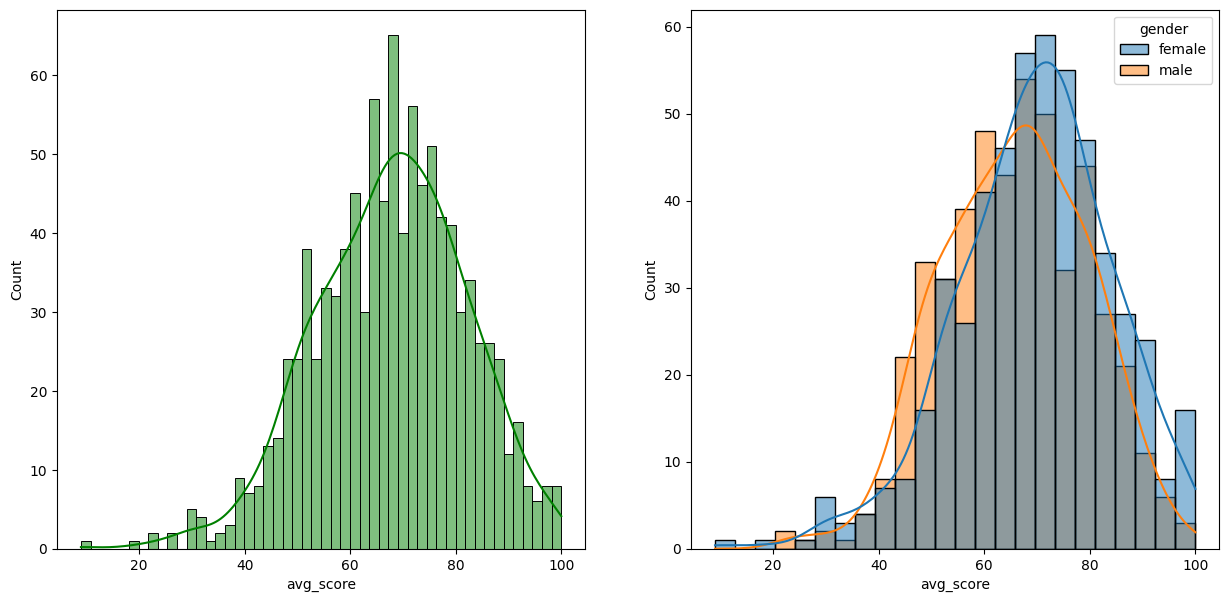

In [60]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=50,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=df,x='avg_score',hue='gender',kde=True)

<Axes: xlabel='avg_score', ylabel='Count'>

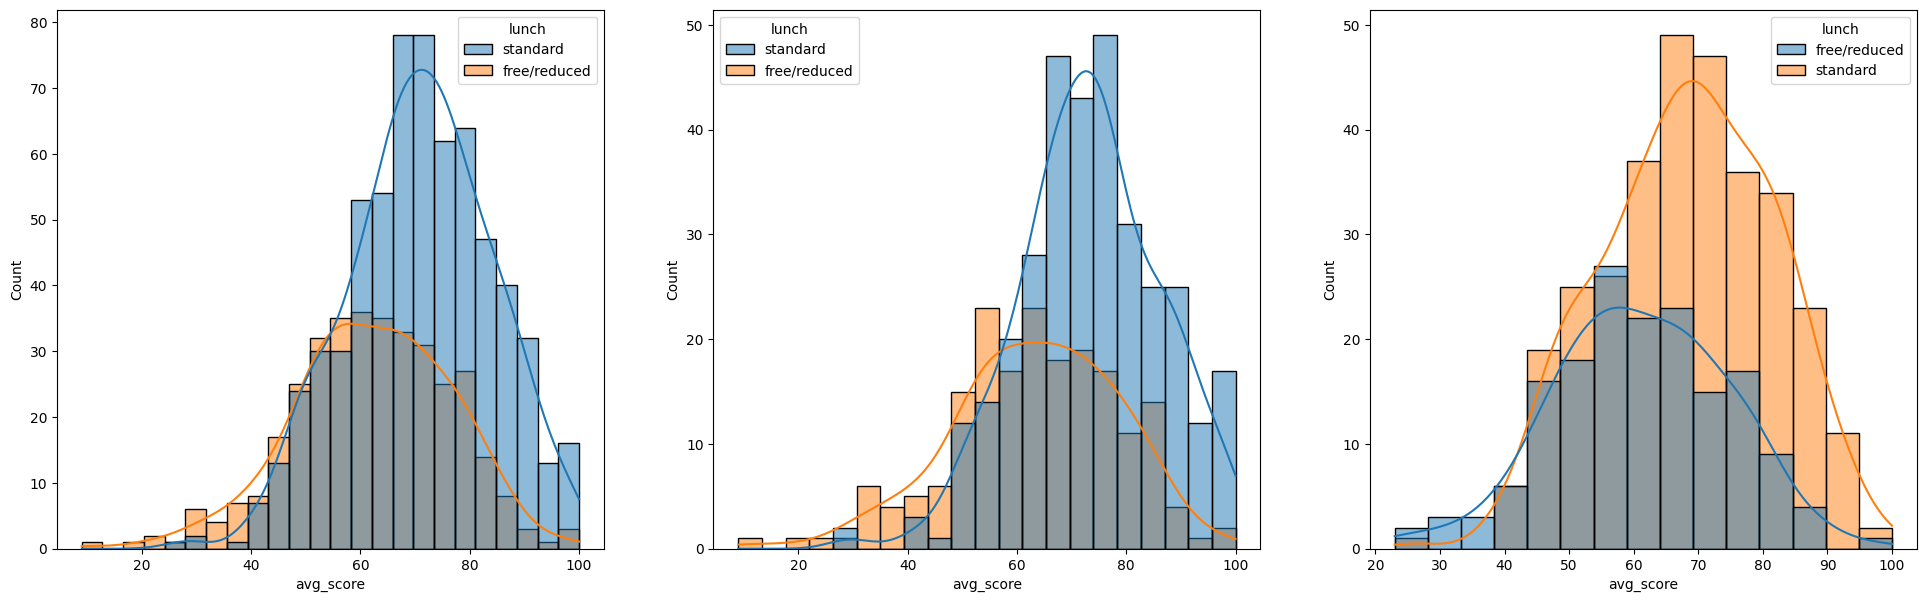

In [72]:
plt.subplots(1,2,figsize=(24,7))
plt.subplot(131)
sns.histplot(data=df,x='avg_score',hue='lunch',kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'],x='avg_score',hue='lunch',kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='avg_score',hue='lunch',kde=True)



<Axes: xlabel='avg_score', ylabel='Count'>

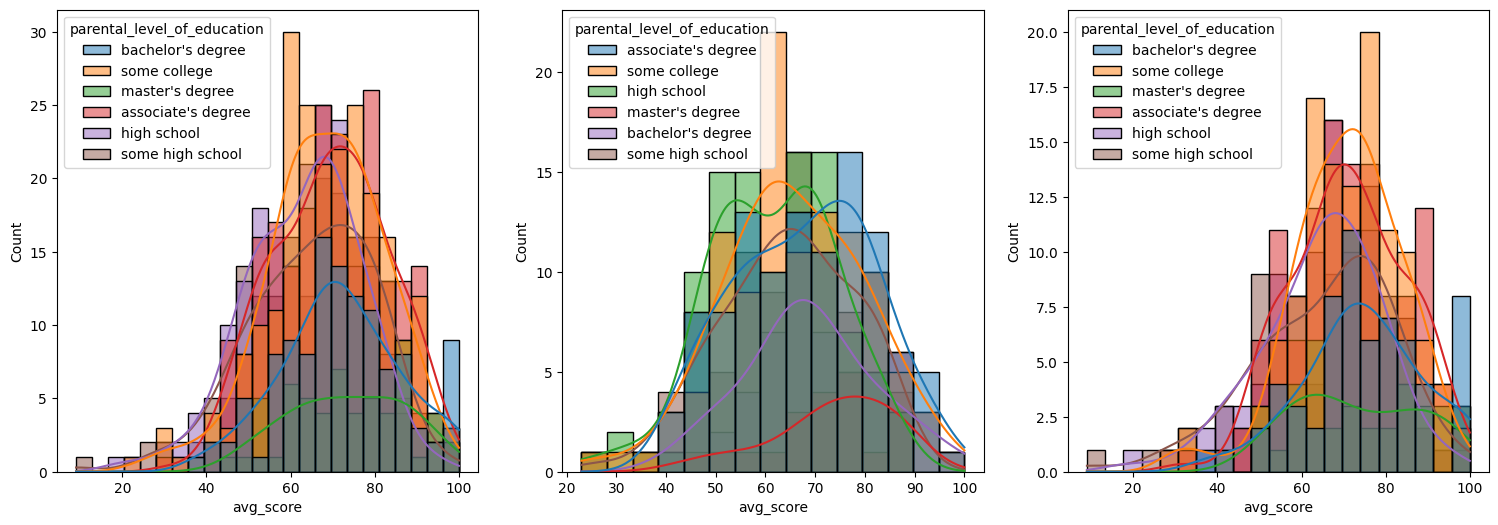

In [74]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='parental_level_of_education')


In general parent's education don't help student perform well in exam.

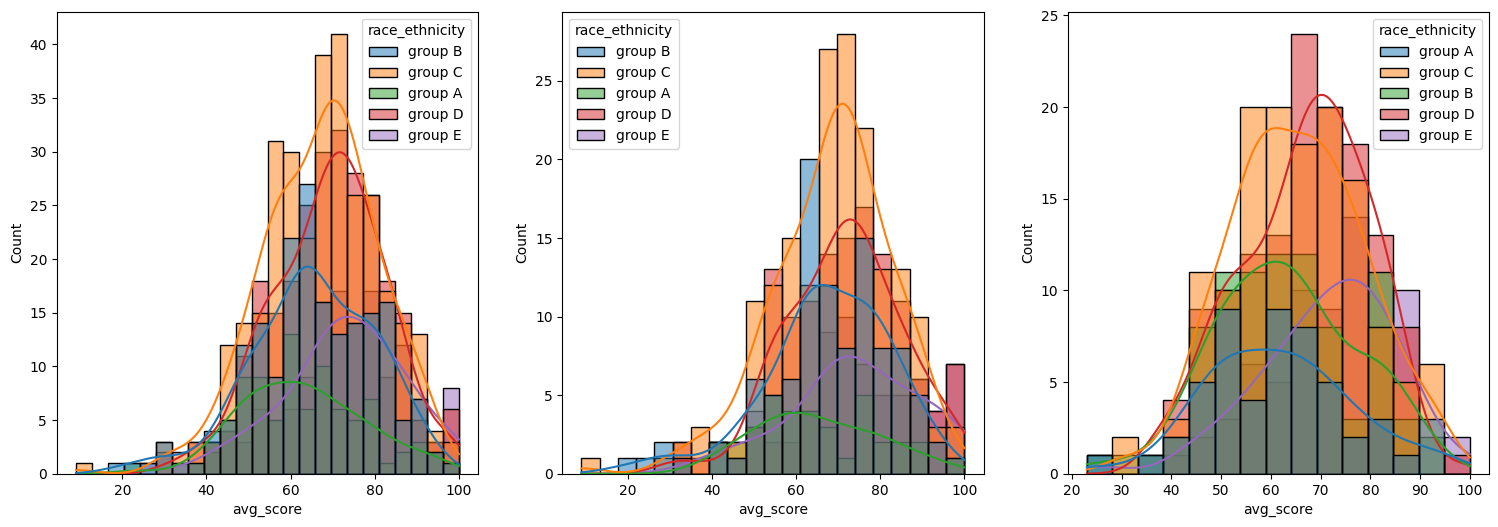

In [76]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity')
plt.show()

Students of group A and group B tends to perform poorly in exam,male or female .

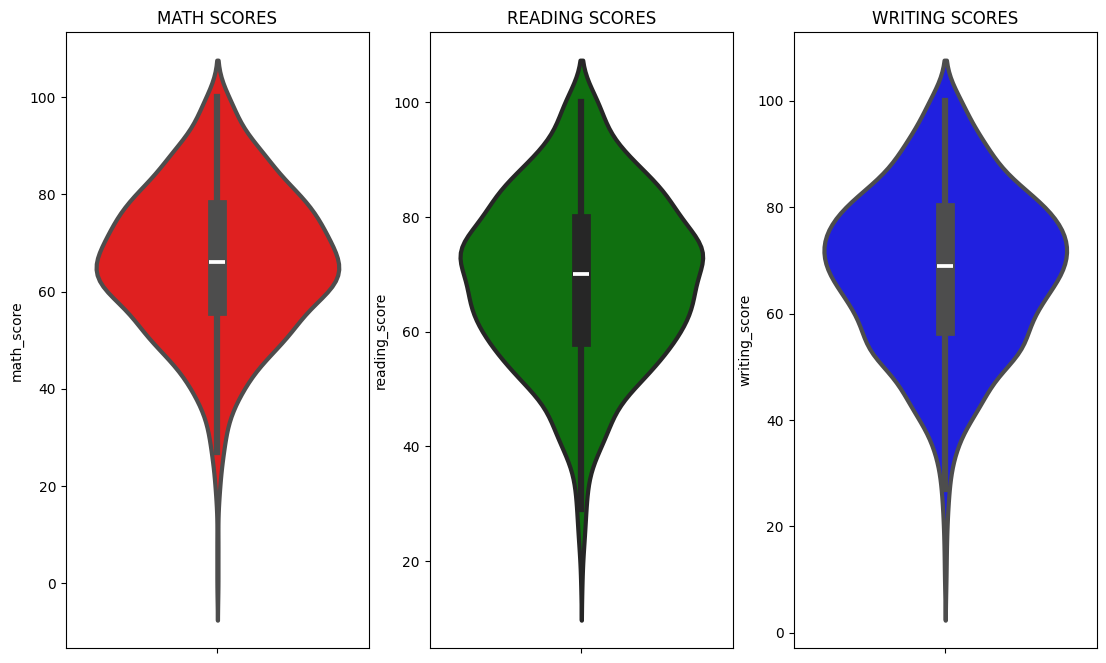

In [77]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

From the plot above , we can see that most students score between 60 and 80 in all modules.

## Multivariate analysis using pieplot


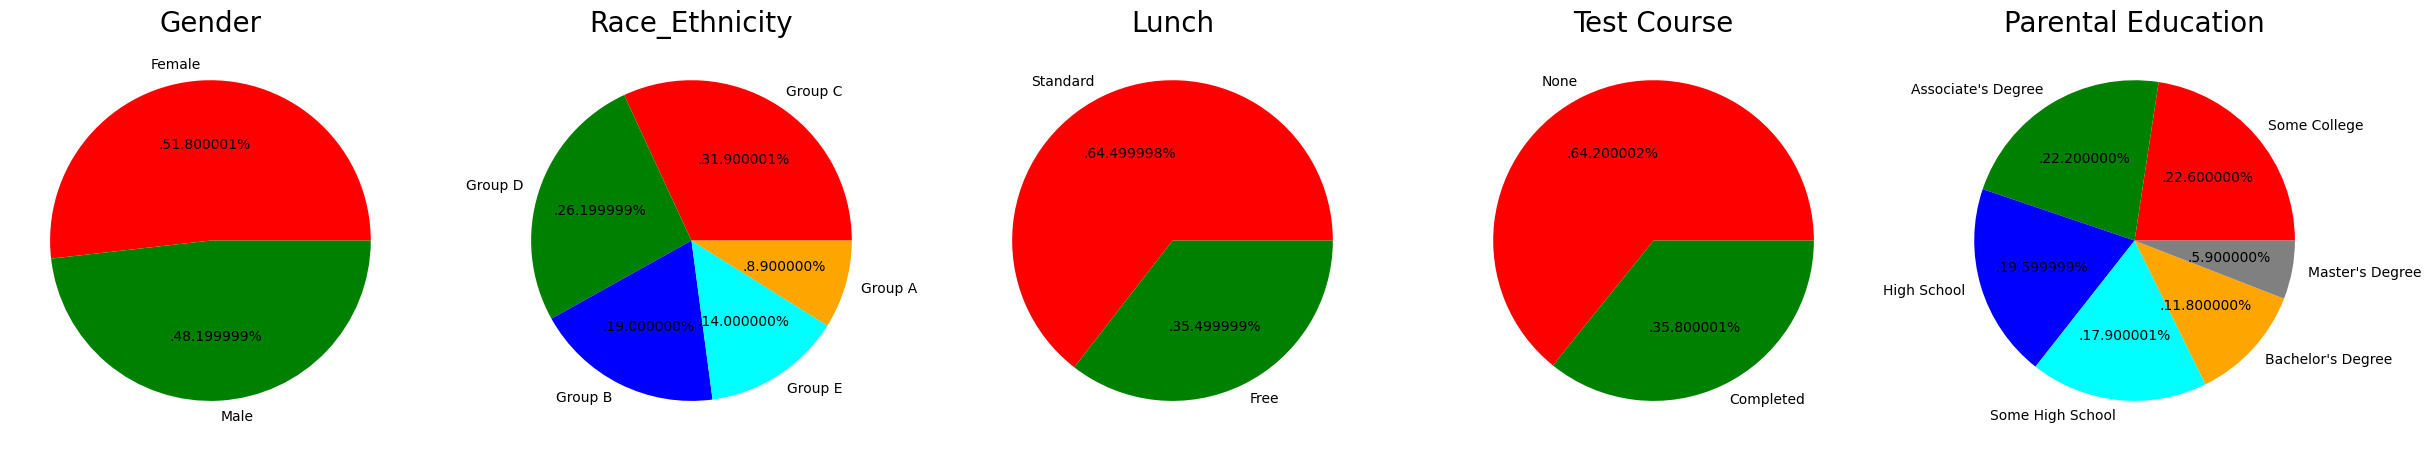

In [86]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')



plt.show()



- Number of females and males is almost equal.
- Most students belong to group C.
- Almost 64.5 % of students eat standerd lunch.
- Number of students not enrolled in test course is way greater .
- Parental educationof students is lead by some college then followed by associate's degree .

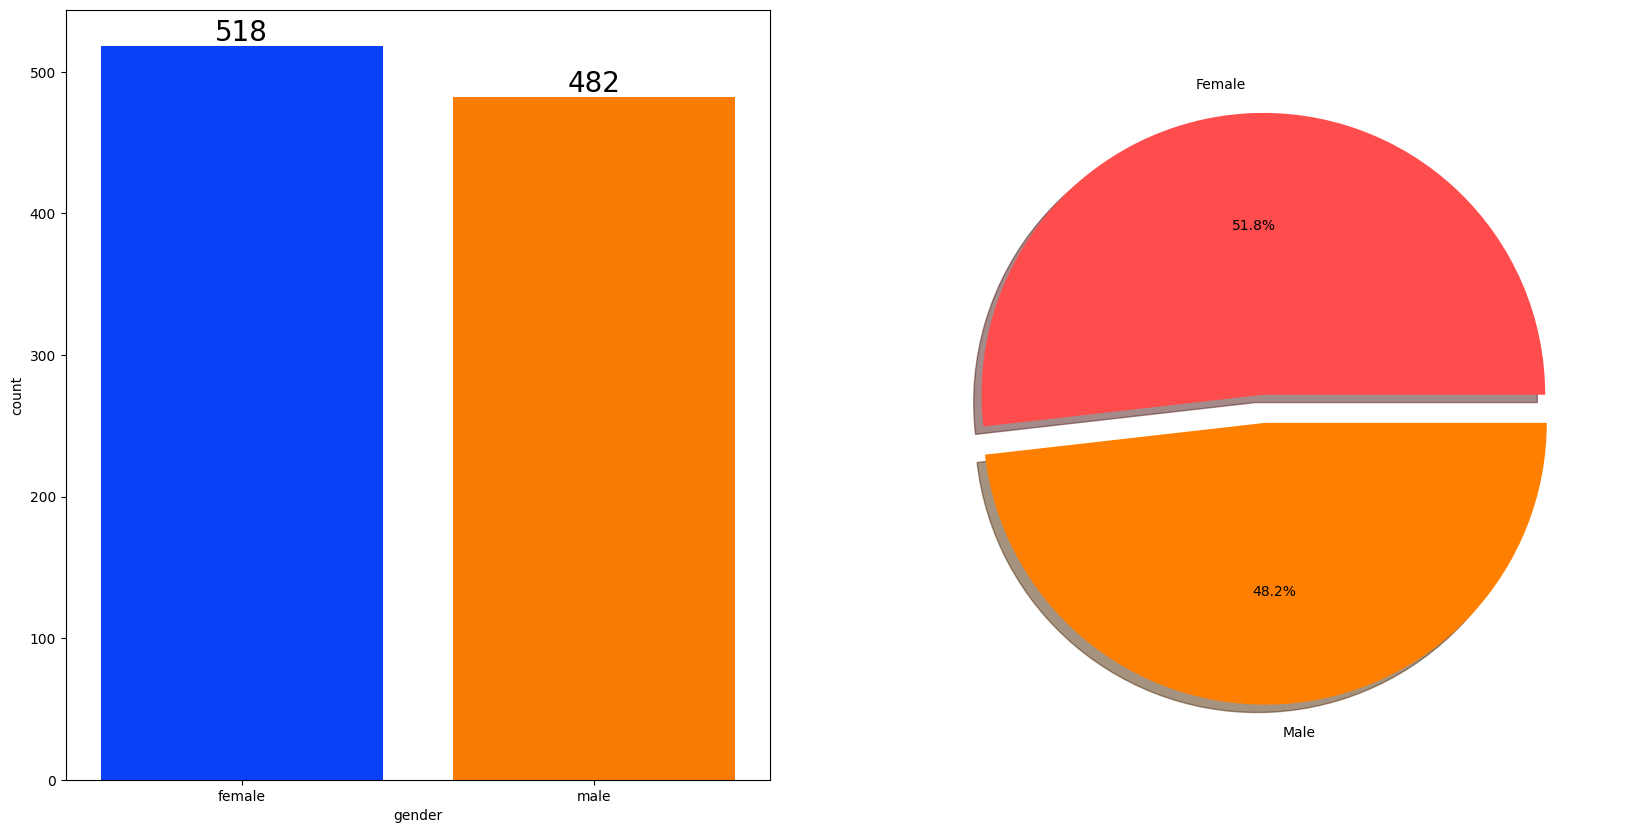

In [89]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

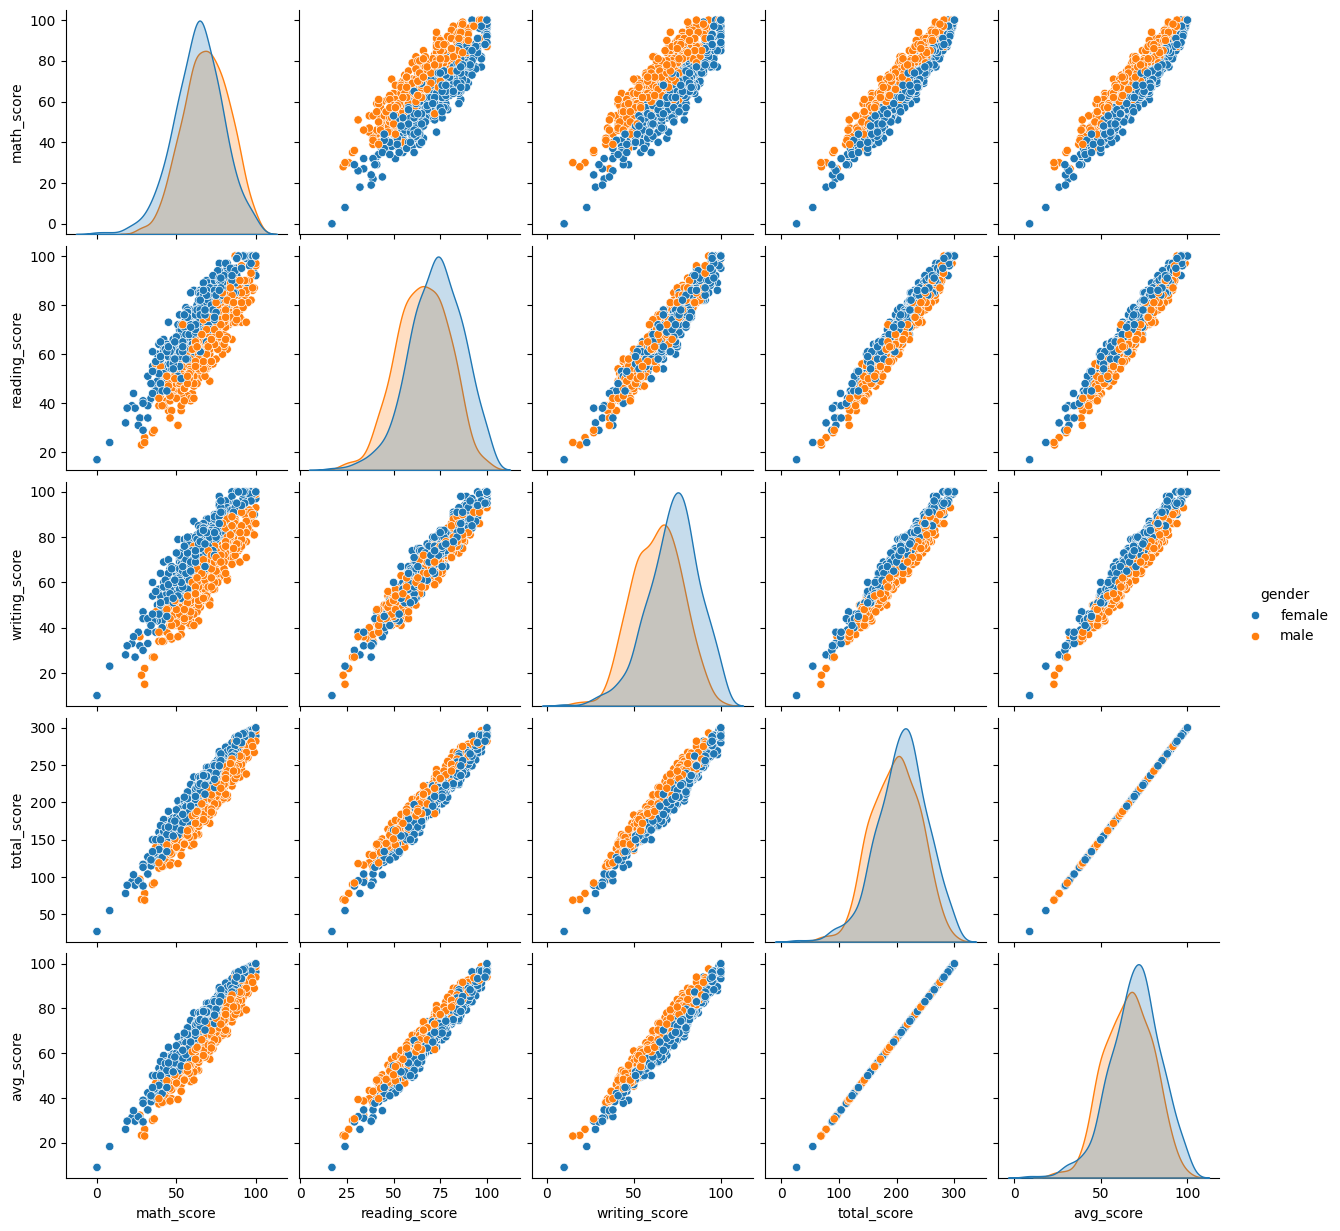

In [90]:

sns.pairplot(df,hue = 'gender')
plt.show()